### Question 1

Use the techniques you learned in class to solve this problem.

(a) Zoo Animal Classification data set will be used in this problem. Load the data set from below link.<br>
https://www.kaggle.com/uciml/zoo-animal-classification

In [188]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import tensorflow as tf

In [292]:
data = pd.read_csv('zoo.csv')
data.head()
data.shape

(101, 18)

(b) List target names and feature names of Zoo Animal Classification dataset.

In [293]:
#Feature names
X = data.iloc[:,:-1]
print("Feature names")
for col in X.columns: 
    print(col)
print('\n')
#Target names
Y = data.iloc[:,-1:]
print('Target names')
for col in Y.columns:
    print(col)


Feature names
animal_name
hair
feathers
eggs
milk
airborne
aquatic
predator
toothed
backbone
breathes
venomous
fins
legs
tail
domestic
catsize


Target names
class_type


(c) Split your data using model selection.train test split to 80% training data and 20% test data.

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4, stratify=Y) #Split data randomly and y variable proportionately

In [295]:
X_train = X_train.iloc[:,1:] # Removing animal name from training and test dataset
X_train.head()
X_test = X_test.iloc[:,1:]
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
21,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0


(d)  Use appropriate model and train with the training data set. Test your trained model on the test data set and classify the values of the samples in the test data set.

In [296]:
#Using Logistic Regression
model = LogisticRegression()
model.fit(X_train,np.ravel(y_train,order='C'))
y_pred = model.predict(X_test)


In [297]:
#Classifying values of test dataset
prediction = pd.DataFrame()
prediction['True_Label'] = y_test.iloc[:,0]
prediction['Predicted_label'] = y_pred
prediction

,True_Label,Predicted_label
17,1,1
0,1,1
12,4,4
46,7,7
21,2,2
56,2,2
18,4,4
6,1,1
62,3,3
50,1,1


(f) Calculate the accuracy and plot Confusion Matrix.
 <br>

Accuracy Score
100.0


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


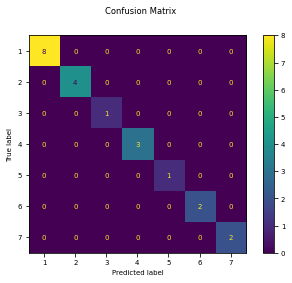

In [298]:
print('Accuracy Score')
print(model.score(X_test,y_test) *100)
print('\n')
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
disp = metrics.plot_confusion_matrix(model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [228]:
# Using SVM
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
data = pd.read_csv('zoo.csv')
data.head()
data.shape

(101, 18)

In [230]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1:]
Y.head()
Y.shape


(101, 1)

In [231]:
#Feature scaling
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#Split data randomly and y variable proportionately
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=5, stratify=Y)
X_train.shape
y_test.shape

(21, 1)

In [232]:
model = svm.SVC(kernel='linear')
model.fit(X_train,np.ravel(y_train,order='C'))
y_pred = model.predict(X_test)

In [233]:
#Classifying values of test dataset
prediction = pd.DataFrame()
prediction['True_Label'] = y_test.iloc[:,0]
prediction['Predicted_label'] = y_pred
prediction

,True_Label,Predicted_label
37,2,2
62,3,3
31,1,1
13,7,7
38,4,4
75,1,1
94,1,1
56,2,2
41,2,2
88,6,6


In [234]:
print('Accuracy score')
print(metrics.accuracy_score(y_test, y_pred) *100)

Accuracy score
100.0


[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


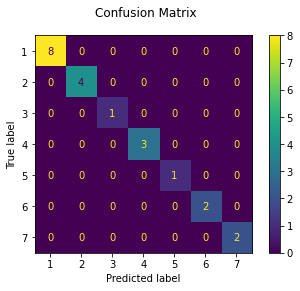

In [235]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
disp = metrics.plot_confusion_matrix(model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [205]:
#Using Softmax regression
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#Placeholder is a space to put and change values while the program is running.
Y_tf = tf.placeholder(tf.int32, [None, 1]) #Place holder for 1 column
X_tf = tf.placeholder(tf.float32, [None,16]) #Place holder for 1 column
Y_one_hot = tf.one_hot(Y_tf, 7)  # one hot encoding


In [206]:
Y_one_hot = tf.reshape(Y_one_hot, [-1, 7])
#Initialising Weight & Bias values randomly
W = tf.Variable(tf.truncated_normal([16, 7])) 
b = tf.Variable(tf.truncated_normal([7]))

In [207]:
logits = tf.matmul(X_tf, W) + b

In [208]:
hypothesis = tf.nn.softmax(logits)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)) # Calculate mean of loss function

In [209]:
optimizer  = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss) # GradientDescent optimizer with leraning rate 0.05 to minimise loss function

In [210]:
predictions = tf.argmax(hypothesis, 1) # returns index with largest value in the tf vector
correct_prediction = tf.equal(predictions, tf.argmax(Y_one_hot, 1))# Returns truth value of predictions & labels element wise
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))# Convert to float using tf.cast and compute mean of elements

In [211]:
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    for step in range(5000):
        session.run(optimizer, feed_dict={X_tf: X_train, Y_tf: y_train})  
    test_accuracy = session.run(accuracy, feed_dict={X_tf: X_test, Y_tf: y_test})
    print("Model Accuracy =", test_accuracy)

Model Accuracy = 0.9047619


(e) Write your comments about the confusion matrix of your experiment.

The Zoo animal classification dataset is trained with 3 different ML alogorithms and observations are as follows
1. Logistic Regression - Model was able to predict the classes with 100% accuracy
2.SVM - Model was able to predict the classes with 100% accuracy
3. Softmax regression - Model was able to predict the classes with 90.4% accuracy

Observations on Confusion Matrix of Logistic Regression & SVM
It has true value of class label and predicted value of class label. 
Cij is equal to the number of observations known to be in i group  and predicted to be in j group .
C1,1 is count of true positives in the matrix (i.e values in diagonal of matrix and Off diagonal values are misclassified values)
It can be observed that there are only true positives in matrix and no false positives/false negatives in the predicted labels


### Question 2

The handwritten digit data set MNIST is a subset of NIST, which can be used for simple implementation of machine learning algorithms. In this problem, you will use support vector machine to finish the classification of MNIST. <br>
https://www.kaggle.com/c/digit-recognizer/data

(a) Load the first 10K samples from "train.csv" and split them into training and testing data by 0.2. Use sklearn.svm to train a model with raw pixel features. Choose the linear kernel and set C = 5 and gamma= 0.05. Report the model.

In [236]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
data = pd.read_csv('train.csv') # Loading dataset
data.head()
data.shape
data = data.iloc[0:10000,:] # Loading first 10K samples from train.csv
data.shape
data.isnull().sum()  # It can be observed that there are no missing values in dataset
X = data.iloc[:,1:]
X.head()
Y = data.iloc[:,0]
Y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [288]:
#Feature scaling before using SVM
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2,random_state = 1)
X_train.shape
linear_model = svm.SVC(kernel='linear',C=5,gamma=0.05)
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)

In [289]:
# Checking accuracy score of model
print('Accuracy score')
print(metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy score
90.55


In [291]:
prediction = pd.DataFrame()
prediction['Actual value'] = y_test
prediction['Predicted value'] = y_pred
prediction

,Actual value,Predicted value
9953,9,9
3850,2,2
4962,2,2
3886,7,7
5437,8,8
...,...,...
3919,2,2
162,5,5
7903,4,4
2242,8,3


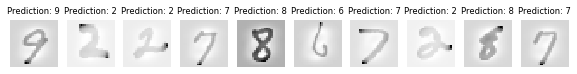

In [241]:
#Plotting predicted values
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 15))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(28,28) # Images have 784 features (28 * 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.rcParams.update({'font.size': 7})
    ax.set_title(f'Prediction: {prediction}')

(b) How many support vectors does each class have? List the support vectors for each class and test the prediction accuracy by metrics.classification report.

In [242]:
# Support Vector Indices
support_vector_indices = linear_model.support_
print('Indices of Support Vectors')
print(support_vector_indices)
print('\n')
indices = pd.DataFrame(support_vector_indices)
indices
# Get number of support vectors per class
support_vectors_per_class = linear_model.n_support_
print('Support Vectors per class')
print(support_vectors_per_class)
print('\n')
# Get support vectors
support_vectors = linear_model.support_vectors_
print('Sample of Support Vectors')
print(support_vectors[1:74,1:74])

Indices of Support Vectors
[  14   85  157 ... 7973 7979 7986]


Support Vectors per class
[183 135 256 269 234 317 201 226 311 283]


Sample of Support Vectors
[[ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 ...
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]]


In [119]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test,y_pred))
#This report shows metrics for each class label
#Precision - percent of  predictions correct i.e positive prediction value 
#Recall - percent of the positive cases were reported 
#f1-score - percent of positive predictions that were correct
#Support - Support is the number of actual occurrences of the class in the specified dataset
#Example - for class 1 - precision is 95% which means out of 100 positive values 95 are correct;y predicted as positive
#It can be observed that accuracy is 91% from the report which is same as previously calculated accuracy score

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       205
           1       0.91      0.97      0.94       196
           2       0.87      0.92      0.90       227
           3       0.89      0.87      0.88       206
           4       0.90      0.95      0.92       201
           5       0.84      0.90      0.87       157
           6       0.96      0.94      0.95       207
           7       0.91      0.90      0.90       221
           8       0.91      0.80      0.85       184
           9       0.89      0.83      0.86       196

    accuracy                           0.91      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.91      0.91      0.90      2000



[[199   0   1   1   0   2   2   0   0   0]
 [  0 190   0   1   0   0   0   1   3   1]
 [  2   0 209   4   2   0   1   5   3   1]
 [  2   0   7 180   0  12   0   1   3   1]
 [  1   2   2   0 190   0   0   0   0   6]
 [  0   2   1   6   2 141   2   0   2   1]
 [  3   1   4   0   3   2 194   0   0   0]
 [  0   3   4   1   4   0   0 198   2   9]
 [  1   7   7   6   1  10   2   2 147   1]
 [  1   3   4   3  10   0   1  10   1 163]]


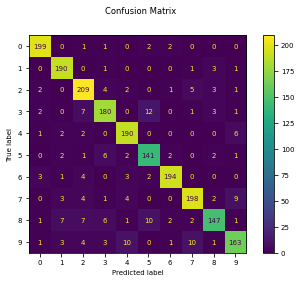

In [243]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
disp = metrics.plot_confusion_matrix(linear_model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [ ]:
# Observations
# For label 0, 199 values are predicted correctly and 6 values are misclassified
# Diagonal values give number of true positives for each label 
# Non diagonal values give number of misclassified values for each label

(c) Repeat (a) and (b) with a RBF kernel and the same C and gamma.

In [244]:
data = pd.read_csv('train.csv') # Loading dataset
data.head()
data.shape
data = data.iloc[0:10000,:] # Loading first 10K samples from train.csv
data.shape
data.isnull().sum()  # It can be observed that there are no missing values in dataset
X = data.iloc[:,1:]
X.head()
Y = data.iloc[:,0]
Y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [277]:
data = pd.read_csv('train.csv')
data.head()
data = data.iloc[0:10000,:]
Y = data['label']
X = data.drop(columns = 'label')
print(Y.shape)
print(X.shape)
Y.head()

(10000,)
(10000, 784)


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [278]:
#Feature scaling before using SVM
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2,random_state = 1)
X_train.shape
#Training model
rbf_model = svm.SVC(kernel='rbf', C=5, gamma=0.05)
rbf_model.fit(X_train,y_train)
y_pred = rbf_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.259

In [273]:
y_test

9953    9
3850    2
4962    2
3886    7
5437    8
       ..
3919    2
162     5
7903    4
2242    8
2745    4
Name: label, Length: 2000, dtype: int64

In [247]:
print('Test accuracy score')
print(rbf_model.score(X_test, y_test) *100)
print('\n')
print('Training accuracy score')
print(rbf_model.score(X_train, y_train) *100)

Test accuracy score
25.900000000000002


Training accuracy score
100.0


In [262]:
print(y_test.shape)
print(y_pred.shape)

(2000,)
(2000,)


In [279]:
prediction = pd.DataFrame()
prediction['Actual value'] = y_test
prediction['Predicted value'] = y_pred
prediction

,Actual value,Predicted value
9953,9,2
3850,2,2
4962,2,2
3886,7,7
5437,8,2
...,...,...
3919,2,2
162,5,2
7903,4,2
2242,8,2


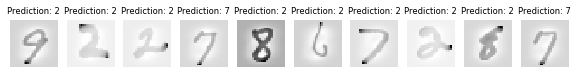

In [248]:
#Plotting predicted labels
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 15))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(28,28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.rcParams.update({'font.size': 7})
    ax.set_title(f'Prediction: {prediction}')

In [249]:
# Support Vector Indices
support_vector_indices = rbf_model.support_
print('Indices of Support Vectors')
print(support_vector_indices)
print('\n')
indices = pd.DataFrame(support_vector_indices)
indices
# Get number of support vectors per class
support_vectors_per_class = rbf_model.n_support_
print('Support Vectors per class')
print(support_vectors_per_class)
print('\n')
# Get support vectors
support_vectors = rbf_model.support_vectors_
print('Sample of Support Vectors')
print(support_vectors[1:74,1:74])

Indices of Support Vectors
[  10   14   15 ... 7978 7979 7986]


Support Vectors per class
[786 708 818 803 766 749 796 818 766 799]


Sample of Support Vectors
[[ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 ...
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]
 [ 0.          0.          0.         ... -0.1422038  -0.14293636
  -0.13365501]]


[[  9   0 196   0   0   0   0   0   0   0]
 [  0 159  37   0   0   0   0   0   0   0]
 [  0   0 227   0   0   0   0   0   0   0]
 [  0   0 202   4   0   0   0   0   0   0]
 [  0   0 195   0   6   0   0   0   0   0]
 [  0   0 157   0   0   0   0   0   0   0]
 [  0   0 200   0   0   0   7   0   0   0]
 [  0   0 158   0   0   0   0  63   0   0]
 [  0   0 184   0   0   0   0   0   0   0]
 [  0   0 151   0   0   0   0   2   0  43]]


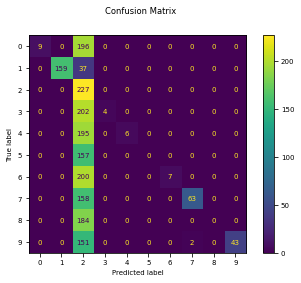

In [280]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
disp = metrics.plot_confusion_matrix(rbf_model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [282]:
import warnings
warnings.filterwarnings("ignore")
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08       205
           1       1.00      0.81      0.90       196
           2       0.13      1.00      0.23       227
           3       1.00      0.02      0.04       206
           4       1.00      0.03      0.06       201
           5       0.00      0.00      0.00       157
           6       1.00      0.03      0.07       207
           7       0.97      0.29      0.44       221
           8       0.00      0.00      0.00       184
           9       1.00      0.22      0.36       196

    accuracy                           0.26      2000
   macro avg       0.71      0.24      0.22      2000
weighted avg       0.73      0.26      0.22      2000



In [ ]:
# Observations:
# It can be observed that accuracy of test model is 26% while training accuracy is 100% which shows the case of overfitting.
# Few labels like 8 ae not at all predicted 
# Predictions are more skewed towards label 2 which can be seen in high recall score and low precision score that most of the predictions are incorrect
# For class 0, precision is high but recall is very low which means model returns very few results, but most of its predicted labels are correct
# f1 score is weighted average of the precision and recall and it can be observed that except for label 1 , the score is less for other labels which shows poor quality of the model


In [148]:
#RBF kernel with default C and gamma values
#Feature scaling before using SVM
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2,random_state = 1)
X_train.shape
rbf_model = svm.SVC(kernel='rbf')
rbf_model.fit(X_train,y_train)
y_pred = rbf_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9345

In [ ]:
#Observations:
# It can be observed that model performed better with C value = 1 i.e lower values of hypermeter

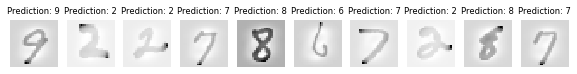

In [149]:
#Plotting results
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 15))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(28,28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.rcParams.update({'font.size': 7})
    ax.set_title(f'Prediction: {prediction}')

(d) Compare the two models and comment on the results.

In [299]:
# Observations of results:
# Gamma is the parameter of a Gaussian Kernel (to handle non-linear classification).
# Small gamma gives a pointed bump in the higher dimensions, a large gamma gives a softer, broader bump.
# So a small gamma will give low bias and high variance while a large gamma will give higher bias and low variance.

# C is the cost of misclassification
# A large C gives low bias and high variance. Low bias because the cost of missclasification is penalized.
# A small C gives  higher bias and lower variance.

# RBF kernel SVM
# The higher the gamma, the higher the hyperplane tries to match the training data.
# hence some misclassifications are to allowed for avoiding overfitting of model by reducing C value
# Large C value is overfitting model and leading to high variance
# RBF model performed well with performance of 93% when C value is decreased to 1
# It can be observed that accuracy of test model is 26% while training accuracy is 100% which shows the case of overfitting.
# Few labels like 8 ae not at all predicted 
# Predictions are more skewed towards label 2 which can be seen in high recall score and low precision score that most of the predictions are incorrect
# For class 0, precision is high but recall is very low which means model returns very few results, but most of its predicted labels are correct
# f1 score is weighted average of the precision and recall and it can be observed that except for label 1 , the score is less for other labels which shows poor quality of the model

# Linear Model SVM
# Model is 91% accurate
#Each label has good precision which shows % of preidcted postives are high
#high precision relates to a low false positive rate, and high recall relates to a low false negative rate. 
#High scores for both show that the linear SVM is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).